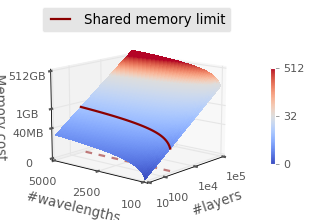

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
plt.style.use('ggplot') 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_facecolor('white')

# Plot a sin curve using the x and y axes.

n_wl = np.linspace(100, 5000, 100)
n_layer_exp = np.linspace(1, 6, 100)
n_layer = 10 ** n_layer_exp

X, Y = np.meshgrid(n_layer_exp, n_wl)
X_value, Y_value = np.meshgrid(n_layer, n_wl)
mem_GB = lambda layer, wl: np.log10(layer * wl / 4 / 1e6)

Z = mem_GB(X_value, Y_value) # GB
from matplotlib import colors
vcenter = cmath.log10(32).real
vmax = cmath.log10(512).real
vmin = mem_GB(100, 10)
divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

s = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',
    linewidth=0, antialiased=False, norm=divnorm, zorder=50,
)
layer384 = np.zeros_like(n_wl) + np.log10(384)
ax.plot(layer384, n_wl, mem_GB(384, n_wl), color='darkred', zorder=100, label='Shared memory limit')
ax.plot(layer384, n_wl, vmin, color='darkred', zorder=0, alpha=0.5, ls='--')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1))

ax.set_xlabel('#layers')
ax.set_xlim(1, 6)
ax.set_xticks([1, 2, 4, 6])
ax.set_xticklabels(['10', '100', '1e4', '1e5'])

ax.set_ylabel('#wavelengths')
ax.set_ylim(1, 5e3)
ax.set_yticks([100, 2500, 5000])
ax.set_yticklabels(['100', '2500', '5000'])

ax.set_zticks([vmin, np.log10(0.04), np.log10(1), vmax])
ax.set_zticklabels(['0', '40MB', '1GB', '512GB'])
ax.set_zlabel('Memory cost')
ax.set_zlim(vmin, vmax)

# colorbar
cbar = fig.colorbar(s, shrink=0.5, pad=0.1, )
cbar.set_ticks([vmin, vcenter, vmax])
cbar.set_ticklabels([0, 32, 512])

fig.set_size_inches(6, 3)
ax.view_init(elev=13, azim=220, roll=0)
fig.savefig('./demo', dpi=300, bbox_inches='tight', pad_inches=0.2)


[1.         1.05333333 1.10666667 1.16       1.21333333 1.26666667
 1.32       1.37333333 1.42666667 1.48      ]


(0.0, 5000.0)

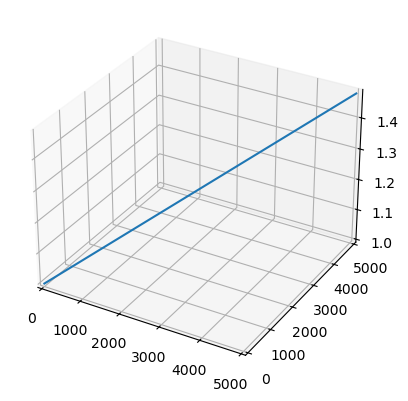

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.plot(n_wl, n_wl, 384 * n_wl / 4 / 1e6 + 1)

print(384 * n_wl / 4 / 1e6 + 1)
